<a href="https://colab.research.google.com/github/elchaima1234/Data-Preprocessing/blob/main/Audio_data_augmentation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WHY WE USE DATA AUGMENTATION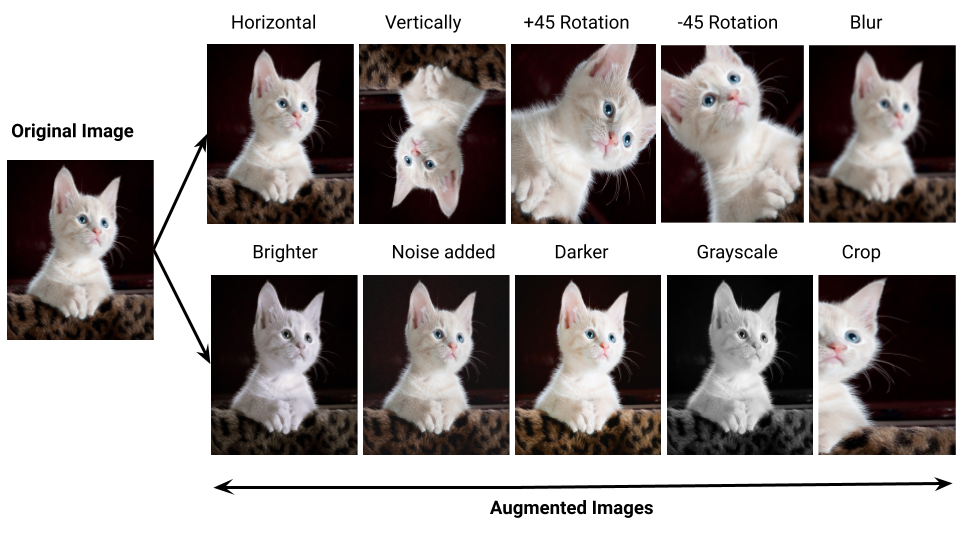**

**What's Data Augmentation :**
Data Augmentation is a technique used to increase the number of samples an ML model sees during training. By applying various transformations to the original audio samples, we can create a more diverse training dataset

**How does data augmentation work**:

It's basically a sort of transformation pipeline that you use, you start with your original audio or any type of data of course and you pass it to like a transformer in the case of **images** it could be like the picture above **Cropping**, **Rotation**...., and in the case of **audio** it could be **adding reverb** or **peach**, and then you get out a new version, a derived version of the original data



**Why should I care about audio data augmentation**

*   Adress the problem of data scarcity.
*   Increase model's robustness.
*   Improve model's accuracy.
*   Reduce overfitting.
*   Save resources.

**Note:** But you should remember that augmented data is not as good as addtional data.


**What data should I augment**


1.  Split your data to train, validation and test sets first.
2.  Apply augmentation to train sets **Only**



**Raw audio augmentation transformations**


📌 Time stretching

📌 Pitch scaling

📌 Noise addition

📌 Impulse response addition

📌 Filters

📌 Polarity Inversion

📌 Random gain

**Spectrogram augmentation transformations**

📌Time masking

📌 Frequency masking

📌 Time stretching

📌 Pitch scaling

In [ ]:
!pip install audiomentations

In [28]:
import random
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import IPython.display as ipd
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter

In [2]:
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [12]:
def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)

In [13]:
def pitch_scale(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

In [14]:
def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal

In [4]:
def invert_polarity(signal):
    return signal * -1

In [7]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    ax[0].plot(signal)
    ax[0].set(title="Original signal")
    ax[1].plot(augmented_signal)
    ax[1].set(title="Augmented signal")
    plt.show()

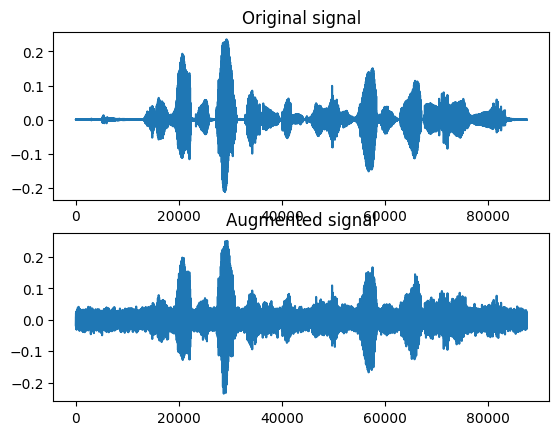

In [24]:
if __name__ == "__main__":
    signal, sr = librosa.load("/content/SA1.WAV.wav")
    augmented_signal = add_white_noise(signal,0.5)
    sf.write("augmented_audio.wav", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)

In [10]:
ipd.Audio('/content/SA1.WAV.wav')

In [25]:
ipd.Audio('/content/augmented_audio.wav')

Actually you don't need to implement all this to do some data augmentation, there is frameworks that are already available out there such as **Librosa**, **audiomentations**, **torchaudio.transforms** and **torch-audiomentations**

In [29]:
# Raw audio augmentation
augment_raw_audio = Compose(
    [
        AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1),
        PitchShift(min_semitones=-8, max_semitones=8, p=1),
        HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=4000, p=1)
    ]
)

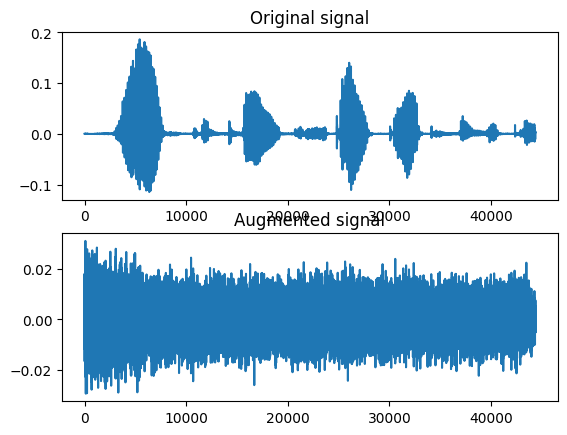

In [32]:
if __name__ == "__main__":
    signal, sr = librosa.load("/content/original_audio.wav")
    augmented_signal = augment_raw_audio(signal, sr)
    sf.write("augmented_audio2.wav", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)

In [31]:
ipd.Audio('/content/original_audio.wav')

In [33]:
ipd.Audio('/content/augmented_audio2.wav')